In [144]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

from statsmodels.sandbox.stats.runs import runstest_1samp 
np.seterr(all='ignore')

{'divide': 'ignore', 'over': 'ignore', 'under': 'ignore', 'invalid': 'ignore'}

In [370]:
def rng(r): # try to overflow for several times
    r *= 314159
    r *= 314159
    r *= 2718281
    r *= 2718281
    return r*r

385625 -456429359


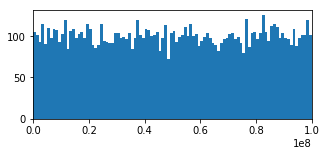

p1 0.22244021263835212
p2 0.6697987274199342


In [371]:
n = 10000 # n numbers
rr = 100000000 # range
m = np.int32(np.random.randint(-2147483648,2147483648-n)) # random starting point of input, say get this from time query gametime
m = 385625
RNG = np.empty(n,dtype=np.int32)
for i in np.arange(m,n+m): # input increases by 1
    RNG[i-m] = rng(np.int32(i))
print(m,RNG[0])
RNG %= rr
plt.figure(figsize=(5,2))
plt.hist(RNG,bins=100)
plt.xlim([0,rr])
plt.show()
print('p1',runstest_1samp(RNG, correction=False)[1]) # test if output distribution is likely random
print('p2',stats.kstest(RNG, stats.uniform(loc=0,scale=rr).cdf)[1]) # test if output distribution is likely uniform